In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.set_index('PassengerId', inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Filling the missing values

In [7]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [8]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode().loc[0])

In [9]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode().loc[0])

In [10]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [11]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
#Handling Outliers

In [12]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

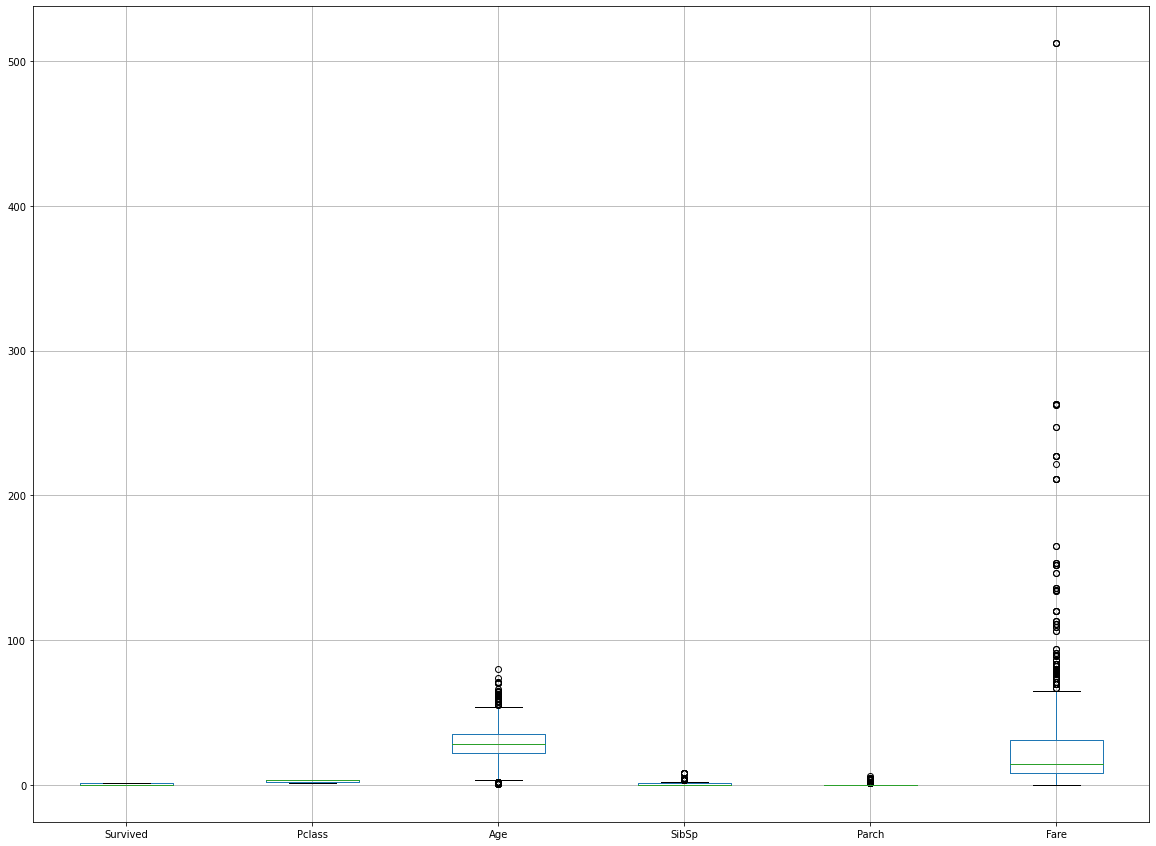

In [13]:
graph=data.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(20,15))
plt.show()

In [14]:
#Computation of Q1,Q2,Q3
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

22.0 28.0 35.0


In [15]:
#Computation of IQR,lower limit and upper limit
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim,up_lim)

2.5 54.5


In [16]:
outliers=[]
for x in data['Age']:
    if (x>up_lim)or(x<low_lim):
        outliers.append(x)
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [17]:
data['Age']=np.where(data['Age']>up_lim,up_lim,np.where(data['Age']<low_lim,low_lim,data['Age']))

In [18]:
#Computation of Q1,Q2,Q3
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

7.9104 14.4542 31.0


In [19]:
#Computation of IQR,lower limit and upper limit
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim,up_lim)

-26.724 65.6344


In [20]:
outliers=[]
for x in data['Fare']:
    if (x>up_lim)or(x<low_lim):
        outliers.append(x)
print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [21]:
index=data['Fare'][(data['Fare']>up_lim)|(data['Fare']<low_lim)].index
data.drop(index,inplace=True)

In [22]:
index=data['SibSp'][(data['SibSp']>2)].index
data.drop(index,inplace=True)

In [23]:
data.shape

(739, 11)

In [57]:
data = pd.get_dummies(data)

In [58]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,3,28.0,0,0,8.4583,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Encoding

In [59]:
y = data['Survived']
X = data.drop('Survived', axis=1)

In [60]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,...,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,2.456022,29.307848,0.274696,0.286874,17.172772,0.001353,0.001353,0.001353,0.001353,0.001353,...,0.002706,0.004060,0.004060,0.001353,0.002706,0.005413,0.001353,0.156969,0.096076,0.746955
std,0.742917,11.312015,0.506378,0.753657,13.425327,0.036786,0.036786,0.036786,0.036786,0.036786,...,0.051987,0.063628,0.063628,0.036786,0.051987,0.073422,0.036786,0.364018,0.294895,0.435051
min,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.891650,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,34.250000,0.000000,0.000000,25.929200,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,54.500000,2.000000,6.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
min_max_scaler = MinMaxScaler(feature_range =(0, 1))

In [63]:
X = min_max_scaler.fit_transform(X)

In [64]:
X = pd.DataFrame(X)

In [65]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,...,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,0.728011,0.515536,0.137348,0.047812,0.264196,0.001353,0.001353,0.001353,0.001353,0.001353,...,0.002706,0.004060,0.004060,0.001353,0.002706,0.005413,0.001353,0.156969,0.096076,0.746955
std,0.371458,0.217539,0.253189,0.125609,0.206543,0.036786,0.036786,0.036786,0.036786,0.036786,...,0.051987,0.063628,0.063628,0.036786,0.051987,0.073422,0.036786,0.364018,0.294895,0.435051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.394231,0.000000,0.000000,0.121410,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.490385,0.000000,0.000000,0.176923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.610577,0.000000,0.000000,0.398911,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Gaussian NB Classifier to predict the model

In [66]:
# splitting into test and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [67]:
X_train.shape

(591, 1467)

In [68]:
X_test.shape

(148, 1467)

In [69]:
#Naive Bayes classifier on the data set
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)
y_pred=NB_model.predict(X_test)

In [70]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
# Evaluating the model using confusion matrix and accuracy score

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pred)

array([[14, 83],
       [ 8, 43]], dtype=int64)

In 148 test dataset, 57 predictions are correct

In [80]:
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))

Accuracy is: 0.824


In [ ]:
#Hyper Parameter tuning

In [73]:
# Displaying the parameters in GaussianNB
print(NB_model.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [74]:
# Using GridSearchCV to find the optimum parameters
import numpy as np
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
NB_grid = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=10,   
                 verbose=1, 
                 scoring='accuracy') 
NB_grid.fit(X_train, y_train)
print(NB_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.12328467394420659}


In [75]:
y_pred=NB_grid.best_estimator_.predict(X_test)

In [78]:
#Evaluating the model
confusion_matrix(y_test,y_pred)


array([[81, 16],
       [10, 41]], dtype=int64)

In [79]:
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))

Accuracy is: 0.824


The accuracy score  has increased after hypertuning.
